In [1]:
import tensorflow as tf

# Cifar10 Datensatz laden
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


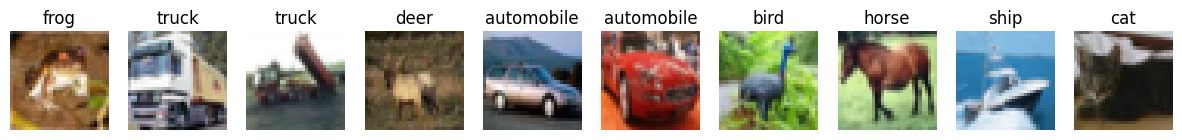

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Klassenlabels für CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Funktion zum Anzeigen der Bilder mit Labels
def show_images(images, labels, num_images=10):
  plt.figure(figsize=(15, 5))
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i][0]])
    plt.axis('off')
  plt.show()

# Zeige die ersten 10 Bilder des Trainingsdatensatzes mit den entsprechenden Labels
show_images(x_train, y_train)


In [3]:
# Modell definieren
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.1),
  tf.keras.layers.RandomZoom(0.1),
  tf.keras.layers.RandomContrast(0.1),
  tf.keras.layers.RandomTranslation(0.1, 0.1)
])

mean = np.mean(x_train, axis=(0, 1, 2))
std = np.std(x_train, axis=(0, 1, 2))

# Erstellen der Normalisierungs-Schicht
normalization_layer = tf.keras.layers.Normalization(mean=mean, variance=std**2)

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32, 32, 3)),
  data_augmentation,
  normalization_layer,
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

# Modell kompilieren
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Modell trainieren
model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

eval = model.evaluate(x_test, y_test)
print(eval)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ normalization (Normalization)   │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,130 (238.79 KB)

 Trainable params: 61,130 (238.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.2820 - loss: 1.9224 - val_accuracy: 0.4582 - val_loss: 1.4703
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4450 - loss: 1.5176 - val_accuracy: 0.5063 - val_loss: 1.4026
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4995 - loss: 1.3866 - val_accuracy: 0.5481 - val_loss: 1.2816
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5338 - loss: 1.3007 - val_accuracy: 0.5649 - val_loss: 1.2748
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5546 - loss: 1.2492 - val_accuracy: 0.5637 - val_loss: 1.2845
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5730 - loss: 1.1935 - val_accuracy: 0.5892 - val_loss: 1.2148
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5850 - loss: 1.1581 - val_accuracy: 0.5957 - val_loss: 1.1868
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6009 - lo

In [4]:
# Modell speichern.
model.save('./cifar10_model.keras')

In [5]:
model = tf.keras.models.load_model('./cifar10_model.keras')
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6496 - loss: 1.0432


[1.0493836402893066, 0.6535999774932861]

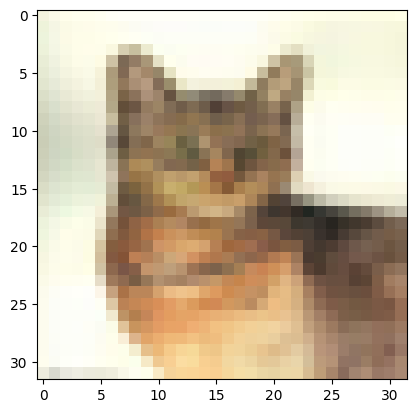

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


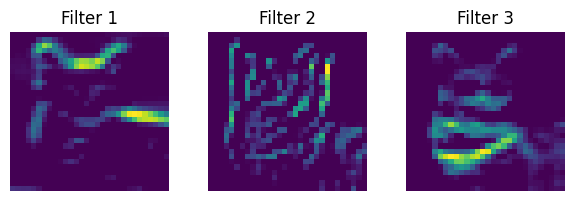

In [6]:
def visualize_first_conv_layer_feature_maps(model, input_image):
    """
    Visualisieren der Feature-Maps der ersten Convolutional-Layer eines Keras-Modells.

    Args:
        model: Das Keras-Modell, das die Feature-Maps visualisieren soll.
        input_image: Das Bild für welches die Feature-Maps erstellt werden sollen.
    """
    # Finden der ersten Conv2D Schicht
    first_conv_layer = None
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Conv2D):
            first_conv_layer = layer
            break

    if first_conv_layer is None:
        print("Error: No convolutional layer found in the model.")
        return

    # Erstellen eines Modells welches die Feature-Maps ausgibt.
    feature_map_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=first_conv_layer.output
    )

    # Erstellen der Feature-Maps
    feature_maps = feature_map_model.predict(input_image)

    # Errechnen der Darstellung
    num_filters = 3# feature_maps.shape[-1]
    num_cols = 8
    num_rows = (num_filters + num_cols - 1) // num_cols

    # Anzeigen der Feature-Maps
    plt.figure(figsize=(2 * num_cols, 2 * num_rows))
    for i in range(num_filters):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

input_image = x_test[786]
plt.imshow(input_image)
plt.show()

input_image = np.expand_dims(input_image, axis=0)
visualize_first_conv_layer_feature_maps(model, input_image)